In [20]:
import simplified_redmapper.cluster_finder as cf
from astropy.table import Table, vstack
import numpy as np
import matplotlib.pyplot as plt

In [2]:
galaxy = Table.read('../../Data/Mock/p100nL1_gcat.txt', format='ascii')
boxsize = 100

In [3]:
pos_array = np.array(galaxy['x', 'y', 'z']).view((float, 3))

In [4]:
galaxy.add_columns([pos_array], names=['pos'])

In [5]:
idx, = np.nonzero(galaxy['Ngal'] > 5)

In [6]:
finder = cf.ClusterFinder(galaxy, 'mstar', 20, central_idx=idx, boxsize=100)

In [7]:
finder.initial_run()

In [9]:
finder.init_central.add_index('ID')

In [10]:
finder.percolation()

In [16]:
final_central = vstack(finder.final_central)

In [17]:
final_member = vstack(finder.final_member)

In [22]:
final_central.add_column((final_central['lambda']/100)**0.2, name='Rc')

In [26]:
final_central.add_index('cID')

Text(0, 0.5, '$\\lambda$')

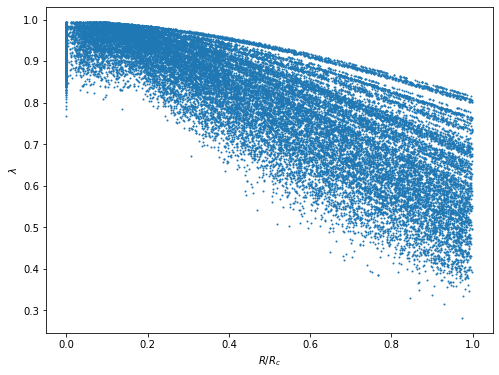

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(final_member['R']/final_central.loc[final_member['cID']]['Rc'], final_member['pmem'], s=1)
plt.xlabel(r'$R/R_c$')
plt.ylabel(r'$\lambda$')

Text(0, 0.5, '$\\lambda$')

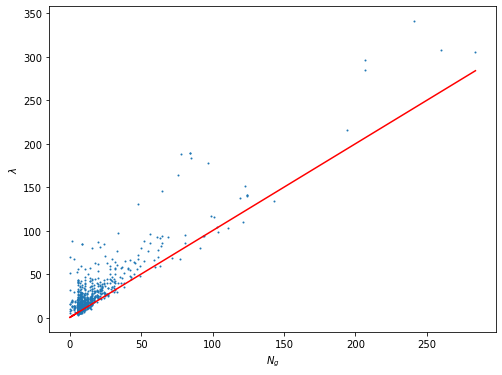

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(final_central['Ngal'], final_central['lambda'], s=1)
plt.plot(final_central['Ngal'], final_central['Ngal'], color='r')
plt.xlabel(r'$N_g$')
plt.ylabel(r'$\lambda$')